# Machine learning (AIC-4101C)

The $k$-means' algorithm (also called Lloyd's algorithm) computes a partition of a set **S** of observations into $k$ subsets. It is composed of an initialization step (randomly choosing an initial partition, or equivalently, the barycenters of each subsets), and two repeated steps until convergence of the method (the partition does not change) :

- **Assignment** : each observation is associated to the partition of the closest barycenter 

$${\large S_i^{(t)} = \left\{\mathbf{x}_j : \|\mathbf{x}_j - \mathbf{m}_i^{(t)} \| \leq \|\mathbf{x}_j - \mathbf{m}_{i^*}^{(t)} \|, \forall i^* = 1, \dots, k \right\} }$$

- **Update** : recompute the barycenter of each partition $${\large\mathbf{m}_i^{(t+1)} = \frac{1}{| S_i^{(t)} |} \sum_{\mathbf{x_j} \in S_i^{(t)}} \mathbf{x}_j}$$

This algorithm finds a local minimum of the cost function $${\large \sum_{i=1}^k \sum_{\mathbf{x}_j \in S_i} \| \mathbf{x}_j - m_i \|^2}$$
This function represents the global error when each observation is replaced by the barycenter of its class.

>Show that both steps minimize the cost function

- Assigment : by definition it minimizes all the distances.
- Update : we have seen that the mean value, that is $\mathbf{m}$, minimizes the euclidean distance. For example, we did that for Linear regression.

>Show that the algorithm converges. 

The number of possible permutations is finite.

>Implement the functions of each step of the algorithm :
- initialisation (take the $k$ first points as barycenters)
- assignment
- update
- loop

The loop function should save the cost function of each iteration, so that you can plot its evolution.

In [2]:
from mllab import *


Packages:
    numpy as np
    matplotlib.pyplot as plt

Functions:
    plotXY
    plot_frontiere
    map_regions



In [3]:
def dist(x, y):
    return ((np.array(x)-np.array(y))**2).sum()

def cost(m, S):
    c = 0
    for i, mm in enumerate(m):
        for x in S[i]:
            c += dist(x, mm)
    return c

def init(k, x):
    return x[:k]

def assign(x, m):
    n, d = np.shape(x)
    k = len(m)
    y = list()
    
    S = dict([(i, []) for i in range(k)])
    
    for xx in x:
        i, d = 0, dist(xx, m[0])
        for i_star, mm in enumerate(m[1:]):
            d_star = dist(xx, mm)
            if d_star < d:
                i, d = i_star+1, d_star
                
        S[i].append(xx)
        y.append(i)
    
    return S, y

def update(S):
    m = [0]*len(S)
    for i, S_i in S.items():
        m[i] = np.mean(S_i, axis=0).tolist()

    return m

def loop(k, x, m0):
    converged = False
    c = list()
    
    while not converged:
        S, y = assign(x, m0)
        m = update(S)
        converged = np.prod(m==m0)
        m0 = m
        c.append(cost(m ,S))
    
    _, y = assign(x, m0)
    
    return np.array(m), np.array(c), np.array(y)

>Apply your method on generated data and check that your cost function is decreasing.

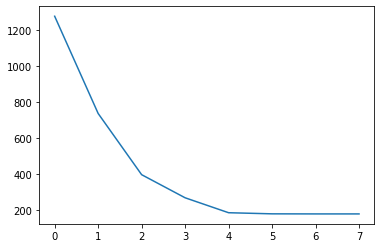

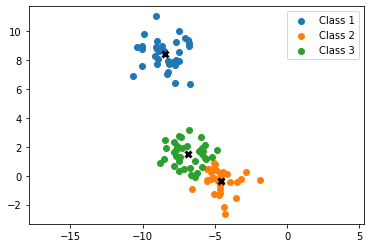

In [4]:
from sklearn.datasets import make_blobs

k = 3
X, _ = make_blobs(n_features=2, centers=k, cluster_std=1)

M0 = init(k, X) 
M, C, y = loop(k, X, M0)

plt.plot(C)
plt.show()

plotXY(X, y)
for kk in range(k):
    plt.scatter(M[kk, 0], M[kk, 1], color='black', marker='x', lw=3)
plt.show()

The quality of the local minimum depends on the initial choice of barycenters : we know that the minimum can be arbitrarily bad and that the worst case is reached in practice. Different strategies have been proposed.

The simplest one is the one we implemented : choose the $k$ first points of our set.

>Show with a simple example that we can converge to a bad local minimum.

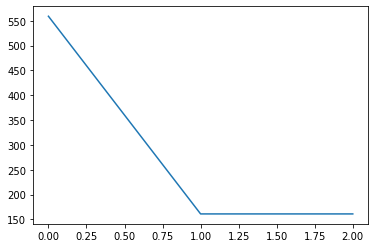

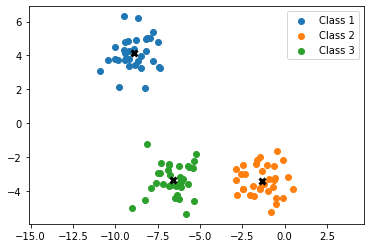

In [5]:
from sklearn.datasets import make_blobs

k = 3
X, _ = make_blobs(n_features=2, centers=k, cluster_std=1)

M0 = init(k, X) 
M, C, y = loop(k, X, M0)

plt.plot(C)
plt.show()

plotXY(X, y)
for kk in range(k):
    plt.scatter(M[kk, 0], M[kk, 1], color='black', marker='x', lw=3)
plt.show()

The most used method is to choose randomly those $k$ points amongst the data set.

>Write an initialization function using that strategy. Is this method better that the previous one ? How would you improve it ?

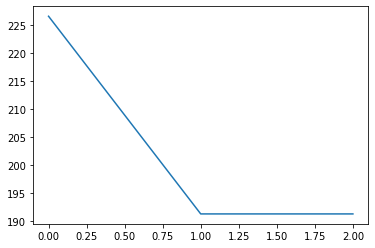

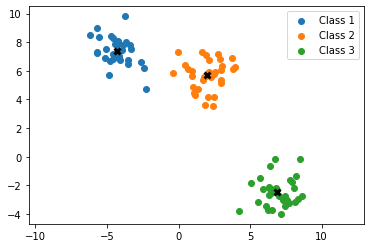

In [6]:
from sklearn.datasets import make_blobs

k = 3
X, _ = make_blobs(n_features=2, centers=k, cluster_std=1)

M0 = np.random.permutation(X)[:k]
M, C, y = loop(k, X, M0)

plt.plot(C)
plt.show()

plotXY(X, y)
for kk in range(k):
    plt.scatter(M[kk, 0], M[kk, 1], color='black', marker='x', lw=3)
plt.show()

The $k$-means++ strategy gives us a warranty of approximate our local minimum in a $O(\log k)$ time :
- Choose a first barycenter $c_1$ randomly.
- Given the $p$-first barycenters $c_1, \dots, c_p$, choose point $x$ to be barycenter $c_{p+1}$ with probability ${\large \frac{D(x)}{\sum_{i=1}^n D(x_i)}}$, where $D(x) = \min_{1 \leq i \leq p} \| x - c_i \|$

>Write an initialization function using that method.

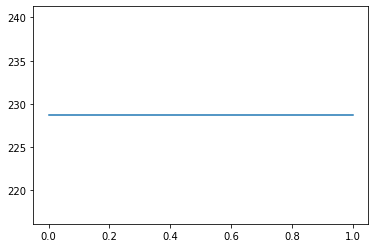

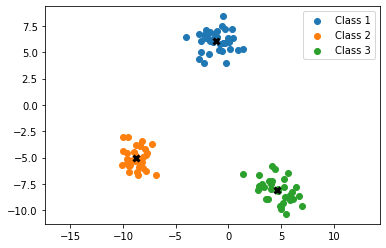

In [7]:
from sklearn.datasets import make_blobs

k = 3
X, _ = make_blobs(n_features=2, centers=k, cluster_std=1)

M0 = np.zeros((k,X.shape[1]))
M0[0] = X[np.random.choice(np.arange(len(X)))]
for j in range(1,k):
    bars = M0[:j]
    min_dist=np.zeros(len(X))
    for i in range(len(X)):
        bars_dist=[dist(X[i],bars[e]) for e in range(len(bars))]
        min_dist[i]=np.sqrt(min(bars_dist))
    p = min_dist/min_dist.sum()
    M0[j]=X[np.random.choice(np.arange(len(X)),p=p)]

M, C, y = loop(k, X, M0)

plt.plot(C)
plt.show()

plotXY(X, y)
for kk in range(k):
    plt.scatter(M[kk, 0], M[kk, 1], color='black', marker='x', lw=3)
plt.show()

>Compare the cost functions with the two different methods.

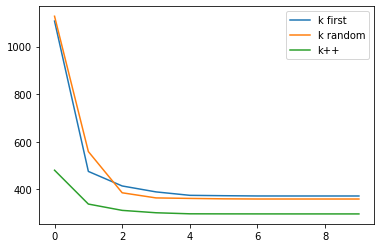

In [8]:
from sklearn.datasets import make_blobs

Nsim=100
pad=10
Costs_first=np.zeros((Nsim,pad))
Costs_rando=np.zeros((Nsim,pad))
Costs_kplus=np.zeros((Nsim,pad))

def Pad(V,pad=10):
    if len(V)>pad:
        return V[:pad]
    else:
        W=np.ones(pad)*V[-1]
        W[:len(V)]=V
        return W

k = 3
n=100

for q in range(Nsim):
    X, _ = make_blobs(n_samples=n,n_features=2, centers=k, cluster_std=1)

    M0 = init(k, X) 
    M, C1, y = loop(k, X, M0)
    Costs_first[q]=Pad(C1,pad=pad)

    M0 = np.random.permutation(X)[:k]
    M, C2, y = loop(k, X, M0)
    Costs_rando[q]=Pad(C2,pad=pad)

    M0 = np.zeros((k,2))
    M0[0] = X[np.random.choice(np.arange(n))]
    for j in range(1,k):
        bars = M0[:j]
        min_dist=np.zeros(n)
        for i in range(n):
            bars_dist=[dist(X[i],bars[e]) for e,f in enumerate(bars)]
            min_dist[i]=np.sqrt(min(bars_dist))
        p = min_dist/min_dist.sum()
        M0[j]=X[np.random.choice(np.arange(n),p=p)]
    M, C3, y = loop(k, X, M0)
    Costs_kplus[q]=Pad(C3,pad=pad)

plt.plot(Costs_first.mean(axis=0),label="k first")
plt.plot(Costs_rando.mean(axis=0),label="k random")
plt.plot(Costs_kplus.mean(axis=0),label="k++")

plt.legend()
plt.show()